In [79]:
from pymongo import MongoClient
from gridfs import GridFS
from bson import objectid

In [80]:
#MongoDB db 생성
MongoClient().python_test

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'python_test')

In [81]:
#python-test db에 CRUD할 수 있는 객체 db
db = MongoClient().python_test

In [82]:
fs = GridFS(db)

In [83]:
fs

In [84]:
with open('C:/ai/workspace/mongodb/test.txt', 'rb') as f:
    print('f:', f)
    print('read:', f.read())
    fs.put(f, filename = 'test.txt')

f: <_io.BufferedReader name='C:/ai/workspace/mongodb/test.txt'>
read: b'mongo DB GRIDFS\xec\x97\x90 \xec\xa0\x80\xec\x9e\xa5\xed\x95\xa0 \xeb\x82\xb4\xec\x9a\xa9\r\n0503 \xec\x88\x98\xec\x97\x85'


In [85]:
find = db.fs.files.find()
list(find)

[{'_id': ObjectId('608f5c2dd7119ab0cf5478a0'),
  'filename': 'test.txt',
  'md5': 'd41d8cd98f00b204e9800998ecf8427e',
  'chunkSize': 261120,
  'length': 0,
  'uploadDate': datetime.datetime(2021, 5, 3, 2, 13, 1, 739000)},
 {'_id': ObjectId('608f5cddd7119ab0cf5478a3'),
  'filename': 'test.txt',
  'md5': 'a77c9cbb755bb1eba41ac727183c0b03',
  'chunkSize': 261120,
  'length': 48,
  'uploadDate': datetime.datetime(2021, 5, 3, 2, 15, 57, 756000)},
 {'_id': ObjectId('608f623fd7119ab0cf5478a6'),
  'filename': 'N6DLP5VOJWF4OCEUFD6X7PTERM.jpg',
  'metadata': {'contentType': 'image/jpg'},
  'chunkSize': 261120,
  'md5': 'fbfdf74c5f8a9bec8e763ef1c74d6063',
  'length': 231842,
  'uploadDate': datetime.datetime(2021, 5, 3, 2, 38, 55, 665000)},
 {'_id': ObjectId('608f7e34d7119ab0cf5478a9'),
  'filename': 'N6DLP5VOJWF4OCEUFD6X7PTERM.jpg',
  'metadata': {'contentType': 'image/jpg'},
  'chunkSize': 261120,
  'md5': 'fbfdf74c5f8a9bec8e763ef1c74d6063',
  'length': 231842,
  'uploadDate': datetime.datetime

In [86]:
#가장 마지막 업로드한 파일 내용을 가져올 객체 생성
reader = fs.get_last_version(filename = 'test.txt')
data = reader.read()
data

b''

In [93]:
data.decode('utf-8')

''

## 이미지파일 저장

In [49]:
from pymongo import MongoClient
from gridfs import GridFS
from bson.objectid import ObjectId
from gridfs import GridFSBucket
import urllib.request

In [50]:
db = MongoClient().python_test
fs = GridFS(db)

In [51]:
url = 'https://cloudfront-ap-northeast-1.images.arcpublishing.com/chosun/N6DLP5VOJWF4OCEUFD6X7PTERM.jpg'
img_type = url.split('.')[-1]
img_type

'jpg'

In [54]:
content_type = 'image/{}' .format(img_type)
content_type

'image/jpg'

In [55]:
img_name = url.split('/')[-1]
img_name

'N6DLP5VOJWF4OCEUFD6X7PTERM.jpg'

In [52]:
image = urllib.request.urlopen(url).read()
image

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xdb\x00C\x00\x02\x01\x01\x02\x01\x01\x02\x02\x02\x02\x02\x02\x02\x02\x03\x05\x03\x03\x03\x03\x03\x06\x04\x04\x03\x05\x07\x06\x07\x07\x07\x06\x07\x07\x08\t\x0b\t\x08\x08\n\x08\x07\x07\n\r\n\n\x0b\x0c\x0c\x0c\x0c\x07\t\x0e\x0f\r\x0c\x0e\x0b\x0c\x0c\x0c\xff\xdb\x00C\x01\x02\x02\x02\x03\x03\x03\x06\x03\x03\x06\x0c\x08\x07\x08\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\xff\xc0\x00\x11\x08\x048\x038\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&

In [56]:
bucket = GridFSBucket(db)

In [57]:
img_storage = bucket.open_upload_stream(img_name, metadata = {'contentType':content_type})
img_storage.write(image)
img_storage.close()

In [58]:
img_storage

In [41]:
!pip install pillow

distutils: c:\users\admin\anaconda3\Include\UNKNOWN
sysconfig: c:\users\admin\anaconda3\Include
user = False
home = None
root = None
prefix = None
distutils: c:\users\admin\anaconda3\Include\UNKNOWN
sysconfig: c:\users\admin\anaconda3\Include
user = False
home = None
root = None
prefix = None


In [59]:
!pip install image

  Created wheel for image: filename=image-1.5.33-py2.py3-none-any.whl size=19486 sha256=bbfb0f28bd2c87dc6fce7a208c0d0f75bd0bf9f7a4736bdc5fa4293f1041842b
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\ac\30\5c\a8b33888bea3507eda7c924a143d34b2390d2ca5b145b327b5
Successfully built image


distutils: c:\users\admin\anaconda3\Include\UNKNOWN
sysconfig: c:\users\admin\anaconda3\Include
user = False
home = None
root = None
prefix = None
distutils: c:\users\admin\anaconda3\Include\UNKNOWN
sysconfig: c:\users\admin\anaconda3\Include
user = False
home = None
root = None
prefix = None


In [76]:
from pymongo import MongoClient
from gridfs import GridFS
from bson.objectid import ObjectId
from gridfs import GridFSBucket
from io import BytesIO
from IPython.display import display
from PIL import Image

In [62]:
#MongoClient() = mongodb의 python_test database에 접속하는 객체 
#db = python-test database의 데이터를 CRUD 할 수 있는 객체
db = MongoClient().python_test

In [64]:
#fs.files = table명(저장된 파일 정보가 저장)
#find() = 전체조회
list(db.fs.files.find())

[{'_id': ObjectId('608f5c2dd7119ab0cf5478a0'),
  'filename': 'test.txt',
  'md5': 'd41d8cd98f00b204e9800998ecf8427e',
  'chunkSize': 261120,
  'length': 0,
  'uploadDate': datetime.datetime(2021, 5, 3, 2, 13, 1, 739000)},
 {'_id': ObjectId('608f5cddd7119ab0cf5478a3'),
  'filename': 'test.txt',
  'md5': 'a77c9cbb755bb1eba41ac727183c0b03',
  'chunkSize': 261120,
  'length': 48,
  'uploadDate': datetime.datetime(2021, 5, 3, 2, 15, 57, 756000)},
 {'_id': ObjectId('608f623fd7119ab0cf5478a6'),
  'filename': 'N6DLP5VOJWF4OCEUFD6X7PTERM.jpg',
  'metadata': {'contentType': 'image/jpg'},
  'chunkSize': 261120,
  'md5': 'fbfdf74c5f8a9bec8e763ef1c74d6063',
  'length': 231842,
  'uploadDate': datetime.datetime(2021, 5, 3, 2, 38, 55, 665000)},
 {'_id': ObjectId('608f7e34d7119ab0cf5478a9'),
  'filename': 'N6DLP5VOJWF4OCEUFD6X7PTERM.jpg',
  'metadata': {'contentType': 'image/jpg'},
  'chunkSize': 261120,
  'md5': 'fbfdf74c5f8a9bec8e763ef1c74d6063',
  'length': 231842,
  'uploadDate': datetime.datetime

In [65]:
#인덱스 2번인 이미지파일 정보 조회
img_file_info = db.fs.files.find()[2]
img_file_info

{'_id': ObjectId('608f623fd7119ab0cf5478a6'),
 'filename': 'N6DLP5VOJWF4OCEUFD6X7PTERM.jpg',
 'metadata': {'contentType': 'image/jpg'},
 'chunkSize': 261120,
 'md5': 'fbfdf74c5f8a9bec8e763ef1c74d6063',
 'length': 231842,
 'uploadDate': datetime.datetime(2021, 5, 3, 2, 38, 55, 665000)}

In [67]:
#파일명 조회
img_file_info['filename']

'N6DLP5VOJWF4OCEUFD6X7PTERM.jpg'

In [68]:
#파일명이 일치하는 마지막 파일 내용을 가져올 객체 last_file return
last_file = fs.get_last_version(filename = img_file_info['filename'])
data = last_file.read()
data

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xdb\x00C\x00\x02\x01\x01\x02\x01\x01\x02\x02\x02\x02\x02\x02\x02\x02\x03\x05\x03\x03\x03\x03\x03\x06\x04\x04\x03\x05\x07\x06\x07\x07\x07\x06\x07\x07\x08\t\x0b\t\x08\x08\n\x08\x07\x07\n\r\n\n\x0b\x0c\x0c\x0c\x0c\x07\t\x0e\x0f\r\x0c\x0e\x0b\x0c\x0c\x0c\xff\xdb\x00C\x01\x02\x02\x02\x03\x03\x03\x06\x03\x03\x06\x0c\x08\x07\x08\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\x0c\xff\xc0\x00\x11\x08\x048\x038\x03\x01\x11\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&

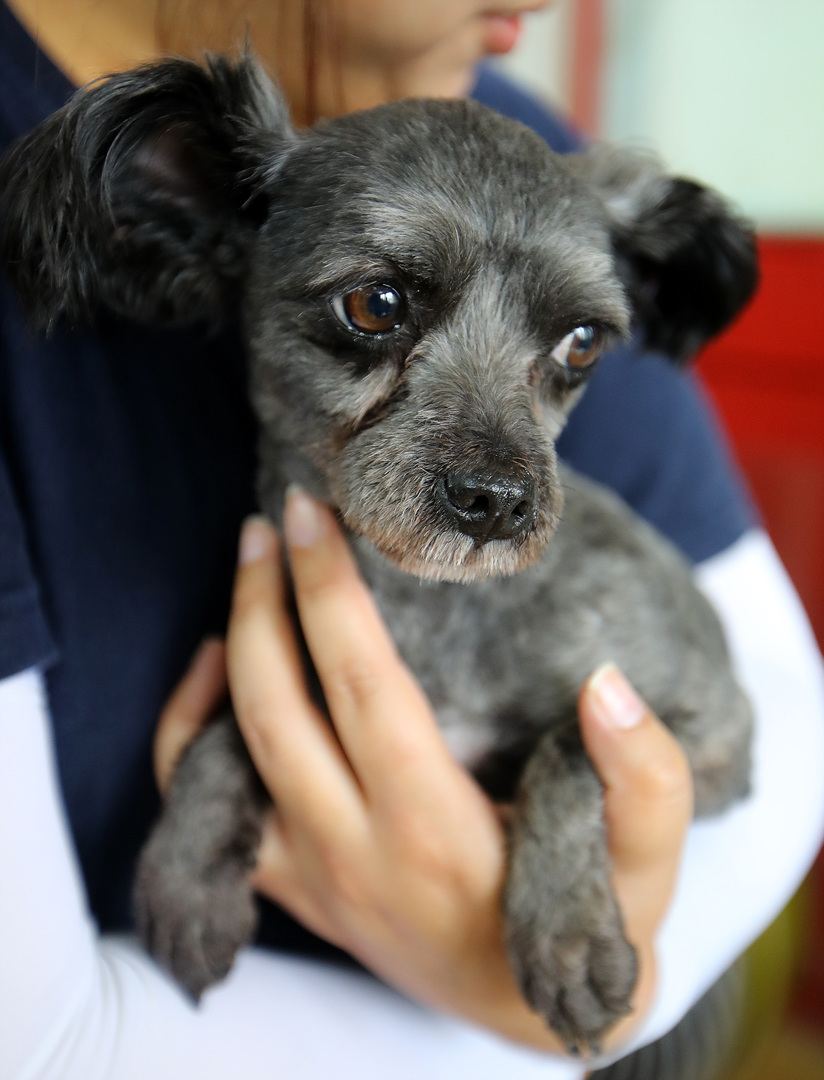

In [78]:
real_img = Image.open(BytesIO(data))
real_img